# **ESG Portfolio Performance Analysis: A Comparative Study of Top and Bottom ESG Risk Scores**

## **Introduction**
Environmental, Social, and Governance (ESG) factors have gained significant attention in recent years as investors increasingly seek to align their portfolios with sustainability and ethical considerations. This study aims to analyze the performance of portfolios constructed based on ESG risk scores. Specifically, it compares the performance of portfolios comprising stocks with the highest and lowest ESG risk scores. The analysis utilizes data from Yahoo Finance, S&P 500 ESG Risk Ratings, risk-free rate data from FRED, and Fama-French factors. The study period spans from January 2000 to June 2024.

## **Datasets**
- **Yahoo Finance dataset from yfinance package**: Used to gather stock price data for S&P 500 companies.
- **S&P 500 ESG Risk Ratings from Kaggle (SP 500 ESG Risk Ratings.csv)**: Contains ESG risk scores for S&P 500 companies. [Dataset link](https://www.kaggle.com/datasets/pritish509/s-and-p-500-esg-risk-ratings)
- **Risk-free rate data from FRED (DTB3.csv)**: Provides the daily risk-free rate. [Dataset link](https://fred.stlouisfed.org/series/DTB3)
- **Fama-French factors dataset**: Includes daily Fama-French factors. [Dataset link](https://github.com/bashtage/python-introduction/blob/main/course/autumn/data/F-F_Research_Data_Factors_daily.csv)


## **1. Data Collection**

In [12]:
import yfinance as yf
import pandas as pd

# Define the time period
start_date = "2000-01-01"
end_date = "2024-06-30"

# Load the ESG data
esg_data_path = 'SP 500 ESG Risk Ratings.csv'
esg_data = pd.read_csv(esg_data_path)

# Extract the list of tickers from the ESG data
tickers = esg_data['Symbol'].unique().tolist()

# Download stock data
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Filter out delisted or missing stocks
valid_tickers = [ticker for ticker in tickers if ticker in stock_data.columns.levels[1]]

# Download stock data again with valid tickers
stock_data = yf.download(valid_tickers, start=start_date, end=end_date)

# Save the stock data to a CSV file
stock_data.to_csv('stock_data.csv')

# Display the first few rows of the stock data
print(stock_data.head())


[*                      3%%                      ]  17 of 503 completed

$BF.B: possibly delisted; No price data found  (1d 2000-01-01 -> 2024-06-30)


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2000-01-01 -> 2024-06-30)')
[*                      3%%                      ]  17 of 503 completed

$BF.B: possibly delisted; No price data found  (1d 2000-01-01 -> 2024-06-30)


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2000-01-01 -> 2024-06-30)')


Price       Adj Close                                                  \
Ticker              A AAL      AAPL ABBV ABNB       ABT      ACGL ACN   
Date                                                                    
2000-01-03  44.290768 NaN  0.859423  NaN  NaN  9.385101  1.277778 NaN   
2000-01-04  40.907444 NaN  0.786965  NaN  NaN  9.116958  1.270833 NaN   
2000-01-05  38.369949 NaN  0.798481  NaN  NaN  9.100201  1.388889 NaN   
2000-01-06  36.908974 NaN  0.729382  NaN  NaN  9.418623  1.375000 NaN   
2000-01-07  39.984726 NaN  0.763932  NaN  NaN  9.519175  1.451389 NaN   

Price                             ... Volume                                   \
Ticker           ADBE        ADI  ...    WTW       WY WYNN      XEL       XOM   
Date                              ...                                           
2000-01-03  16.274673  29.907148  ...    NaN   973700  NaN  2738600  13458200   
2000-01-04  14.909401  28.394154  ...    NaN  1201700  NaN   425200  14510800   
2000-01-05

In [13]:
# Reshape stock data to have a single level column index
stock_data = stock_data.stack(level=1).reset_index()
stock_data.columns = ['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Display the reshaped stock data
print(stock_data.head())


        Date Ticker  Adj Close      Close       High        Low       Open  \
0 2000-01-03      A  44.290768  51.502148  56.464592  48.193848  56.330471   
1 2000-01-03   AAPL   0.859423   0.999442   1.004464   0.907924   0.936384   
2 2000-01-03    ABT   9.385101  15.711531  16.160433  15.599306  15.823756   
3 2000-01-03   ACGL   1.277778   1.277778   1.416667   1.263889   1.409722   
4 2000-01-03   ADBE  16.274673  16.390625  16.875000  16.062500  16.812500   

        Volume  
0    4674353.0  
1  535796800.0  
2   10635087.0  
3     433800.0  
4    7384400.0  


In [14]:
# Convert ESG data Date column to datetime format if necessary
if 'Date' in esg_data.columns:
    esg_data['Date'] = pd.to_datetime(esg_data['Date'])

# Merge stock data with ESG scores
combined_data = pd.merge(stock_data, esg_data, how='left', left_on='Ticker', right_on='Symbol')

# Display the combined dataset
print(combined_data.head())

# Save the combined data to a new CSV file if needed
combined_data.to_csv('combined_stock_esg_data.csv', index=False)


        Date Ticker  Adj Close      Close       High        Low       Open  \
0 2000-01-03      A  44.290768  51.502148  56.464592  48.193848  56.330471   
1 2000-01-03   AAPL   0.859423   0.999442   1.004464   0.907924   0.936384   
2 2000-01-03    ABT   9.385101  15.711531  16.160433  15.599306  15.823756   
3 2000-01-03   ACGL   1.277778   1.277778   1.416667   1.263889   1.409722   
4 2000-01-03   ADBE  16.274673  16.390625  16.875000  16.062500  16.812500   

        Volume Symbol                       Name  ... Full Time Employees  \
0    4674353.0      A  Agilent Technologies Inc.  ...              18,000   
1  535796800.0   AAPL                 Apple Inc.  ...             150,000   
2   10635087.0    ABT        Abbott Laboratories  ...             114,000   
3     433800.0   ACGL     Arch Capital Group Ltd  ...               6,400   
4    7384400.0   ADBE                 Adobe Inc.  ...              29,945   

                                         Description Total ESG Risk 

In [20]:
# Check initial data information
print(combined_data.info())

# Check for missing values
missing_values = combined_data.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

# Check for duplicates
duplicates = combined_data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743870 entries, 0 to 2743869
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Date                    datetime64[ns]
 1   Ticker                  object        
 2   Adj Close               float64       
 3   Close                   float64       
 4   High                    float64       
 5   Low                     float64       
 6   Open                    float64       
 7   Volume                  float64       
 8   Symbol                  object        
 9   Name                    object        
 10  Address                 object        
 11  Sector                  object        
 12  Industry                object        
 13  Full Time Employees     object        
 14  Description             object        
 15  Total ESG Risk score    float64       
 16  Environment Risk Score  float64       
 17  Governance Risk Score   float64       
 18  So

### **Missing Values Heatmap Before Cleaning**

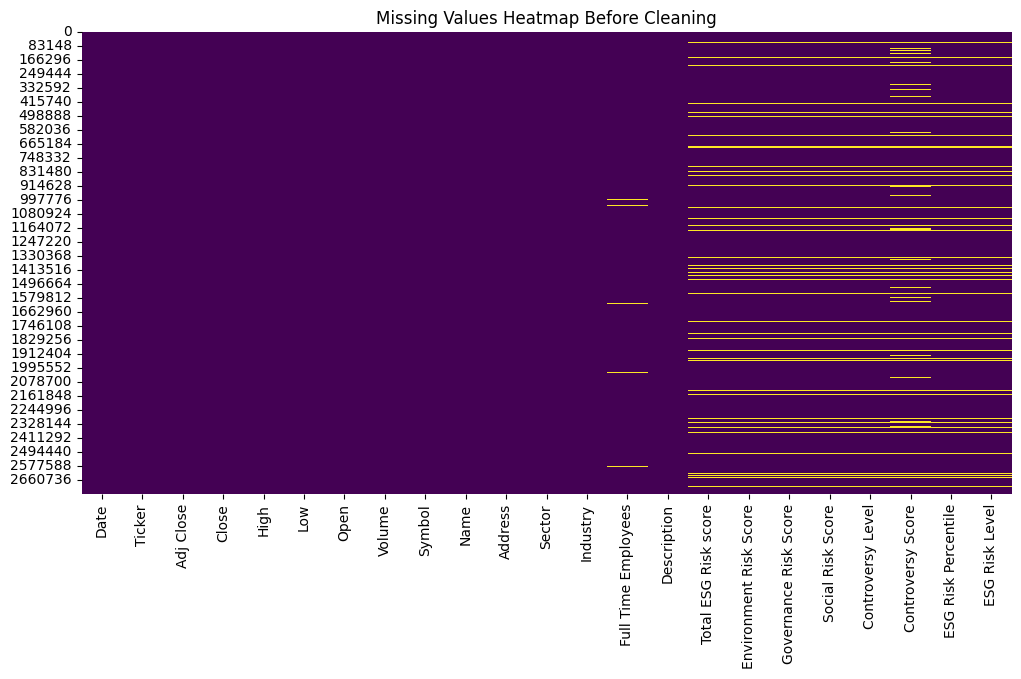

In [47]:
# Plot missing values heatmap before cleaning
plt.figure(figsize=(12, 6))
sns.heatmap(combined_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap Before Cleaning')
plt.show()

- **Observation**: The heatmap reveals substantial missing values in several columns, particularly in ESG-related fields such as Total ESG Risk score, Environment Risk Score, Governance Risk Score, and Social Risk Score. This indicates the need for data cleaning to ensure robust analysis.

In [21]:
# Drop rows with missing values
cleaned_data = combined_data.dropna()

# Check data information after dropping missing values
print("\nData Info After Dropping Missing Values:\n", cleaned_data.info())

# Check for missing values again to ensure they have been dropped
missing_values_after_cleaning = cleaned_data.isnull().sum()
print("\nMissing Values in Each Column After Cleaning:\n", missing_values_after_cleaning)


<class 'pandas.core.frame.DataFrame'>
Index: 2304332 entries, 0 to 2743869
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Date                    datetime64[ns]
 1   Ticker                  object        
 2   Adj Close               float64       
 3   Close                   float64       
 4   High                    float64       
 5   Low                     float64       
 6   Open                    float64       
 7   Volume                  float64       
 8   Symbol                  object        
 9   Name                    object        
 10  Address                 object        
 11  Sector                  object        
 12  Industry                object        
 13  Full Time Employees     object        
 14  Description             object        
 15  Total ESG Risk score    float64       
 16  Environment Risk Score  float64       
 17  Governance Risk Score   float64       
 18  Social 

In [27]:
# Save the cleaned combined data to a new CSV file
cleaned_data.to_csv('cleaned_combined_stock_esg_data.csv', index=False)

# Display the first few rows of the cleaned data
print("\nCleaned Combined Data:\n", cleaned_data.head())


Cleaned Combined Data:
               level_1       Date Ticker  Adj Close      Close       High  \
Date                                                                       
2000-01-03 0        0 2000-01-03      A  44.290768  51.502148  56.464592   
           1        1 2000-01-03   AAPL   0.859423   0.999442   1.004464   
           2        2 2000-01-03    ABT   9.385101  15.711531  16.160433   
           3        3 2000-01-03   ACGL   1.277778   1.277778   1.416667   
           4        4 2000-01-03   ADBE  16.274673  16.390625  16.875000   

                    Low       Open       Volume Symbol  ...  \
Date                                                    ...   
2000-01-03 0  48.193848  56.330471    4674353.0      A  ...   
           1   0.907924   0.936384  535796800.0   AAPL  ...   
           2  15.599306  15.823756   10635087.0    ABT  ...   
           3   1.263889   1.409722     433800.0   ACGL  ...   
           4  16.062500  16.812500    7384400.0   ADBE  ...   



### **Stock Prices Over Time**

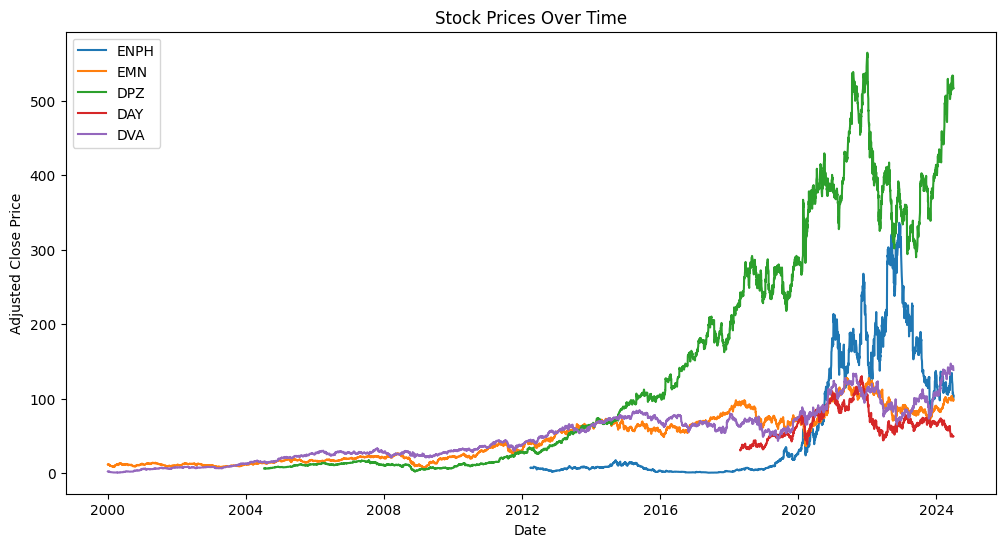

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot stock prices of a few stocks over time
sample_tickers = valid_tickers[:5]
sample_data = stock_data[stock_data['Ticker'].isin(sample_tickers)]
plt.figure(figsize=(12, 6))
for ticker in sample_tickers:
    plt.plot(sample_data[sample_data['Ticker'] == ticker]['Date'], sample_data[sample_data['Ticker'] == ticker]['Adj Close'], label=ticker)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

- **Observation**: The plot of stock prices for selected companies (e.g., ENPH, EMN, DPZ, DAY, DVA) from 2000 to 2024 illustrate significant growth for ENPH and DPZ, reflecting strong market performance. In contrast, other stocks show more modest growth or volatility, emphasizing the varied market behavior among different companies.

### **Distribution of Total ESG Risk Scores**

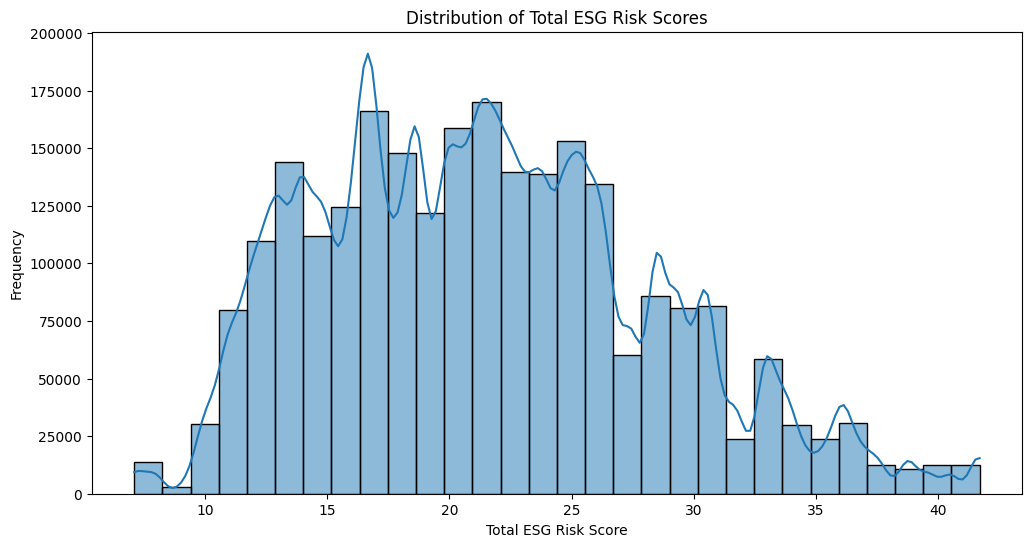

In [48]:
# Plot ESG scores distribution
plt.figure(figsize=(12, 6))
sns.histplot(combined_data['Total ESG Risk score'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total ESG Risk Scores')
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Frequency')
plt.show()

- **Observation**: The histogram of ESG risk scores display a wide distribution with peaks around lower values, indicating that many companies have relatively low ESG risk scores. This suggests a general trend towards better ESG performance within the S&P 500 companies.


## **2. Portfolio Construction**

In [28]:
# Load the cleaned combined data
cleaned_data_path = 'cleaned_combined_stock_esg_data.csv'
cleaned_data = pd.read_csv(cleaned_data_path)

# Ensure data is sorted by Date and Ticker
cleaned_data = cleaned_data.sort_values(by=['Date', 'Ticker'])

# Function to create 'Top' and 'Bottom' portfolios
def create_portfolios(data, score_column, top_percentile=0.1, bottom_percentile=0.1):
    # Rank the data based on the specified score column
    data['Rank'] = data.groupby('Date')[score_column].rank(ascending=False)
    total_count = data.groupby('Date')['Rank'].transform('count')

    # Create 'Top' and 'Bottom' portfolios
    top_portfolio = data[data['Rank'] <= total_count * top_percentile]
    bottom_portfolio = data[data['Rank'] > total_count * (1 - bottom_percentile)]

    return top_portfolio, bottom_portfolio

# Create 'Top' and 'Bottom' portfolios based on Total ESG Risk score
top_portfolio_esg, bottom_portfolio_esg = create_portfolios(cleaned_data, 'Total ESG Risk score')

# Create portfolios based on individual components
top_portfolio_env, bottom_portfolio_env = create_portfolios(cleaned_data, 'Environment Risk Score')
top_portfolio_soc, bottom_portfolio_soc = create_portfolios(cleaned_data, 'Social Risk Score')
top_portfolio_gov, bottom_portfolio_gov = create_portfolios(cleaned_data, 'Governance Risk Score')

# Save the portfolios to CSV files
top_portfolio_esg.to_csv('top_portfolio_esg.csv', index=False)
bottom_portfolio_esg.to_csv('bottom_portfolio_esg.csv', index=False)
top_portfolio_env.to_csv('top_portfolio_env.csv', index=False)
bottom_portfolio_env.to_csv('bottom_portfolio_env.csv', index=False)
top_portfolio_soc.to_csv('top_portfolio_soc.csv', index=False)
bottom_portfolio_soc.to_csv('bottom_portfolio_soc.csv', index=False)
top_portfolio_gov.to_csv('top_portfolio_gov.csv', index=False)
bottom_portfolio_gov.to_csv('bottom_portfolio_gov.csv', index=False)

# Display the first few rows of the 'Top' ESG portfolio
print("\nTop ESG Portfolio:\n", top_portfolio_esg.head())
# Display the first few rows of the 'Bottom' ESG portfolio
print("\nBottom ESG Portfolio:\n", bottom_portfolio_esg.head())



Top ESG Portfolio:
     level_1        Date Ticker  Adj Close      Close       High        Low  \
6         6  2000-01-03    ADM   6.713819  10.884354  10.941043  10.770975   
23       27  2000-01-03    APA  11.536085  14.772727  15.882035  14.745671   
26       31  2000-01-03    ATO   8.394069  20.062500  20.312500  20.000000   
31       36  2000-01-03     BA  25.741438  40.187500  41.687500  39.812500   
53       59  2000-01-03    CAT  11.391552  24.312500  24.500000  23.843750   

         Open     Volume Symbol  ... Environment Risk Score  \
6   10.884354   984753.0    ADM  ...                   16.6   
23  15.882035  1082697.0    APA  ...                   22.0   
26  20.000000    36600.0    ATO  ...                   14.8   
31  41.437500  2638200.0     BA  ...                    8.8   
53  23.843750  5055000.0    CAT  ...                   10.4   

   Governance Risk Score Social Risk Score              Controversy Level  \
6                    5.0              10.1  Significan

### **Total Number of Stocks Analyzed Over Time**

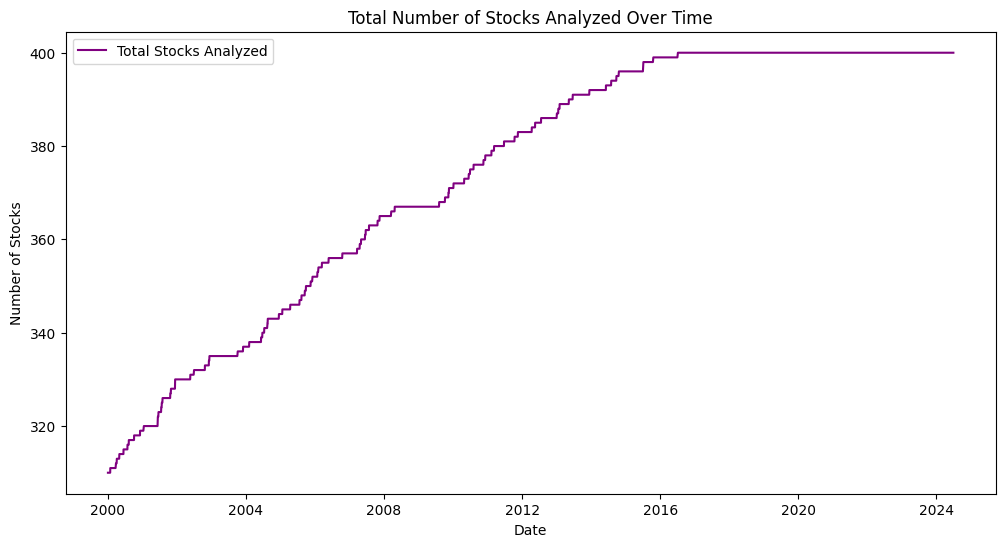

In [71]:
# Plot the total number of stocks analyzed over the entire period
plt.figure(figsize=(12, 6))
total_stocks_over_time = cleaned_data.groupby('Date')['Ticker'].nunique()
plt.plot(total_stocks_over_time.index, total_stocks_over_time.values, label='Total Stocks Analyzed', color='purple')
plt.title('Total Number of Stocks Analyzed Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.legend()
plt.show()

- **Observing**: The line plot is showing a steady increase in the number of stocks being analyzed over the years, reflecting an expanding dataset and growing interest in ESG metrics. The total number of stocks analyzed is reaching approximately 400 by 2024.

### **Average ESG Risk Scores Over Time**

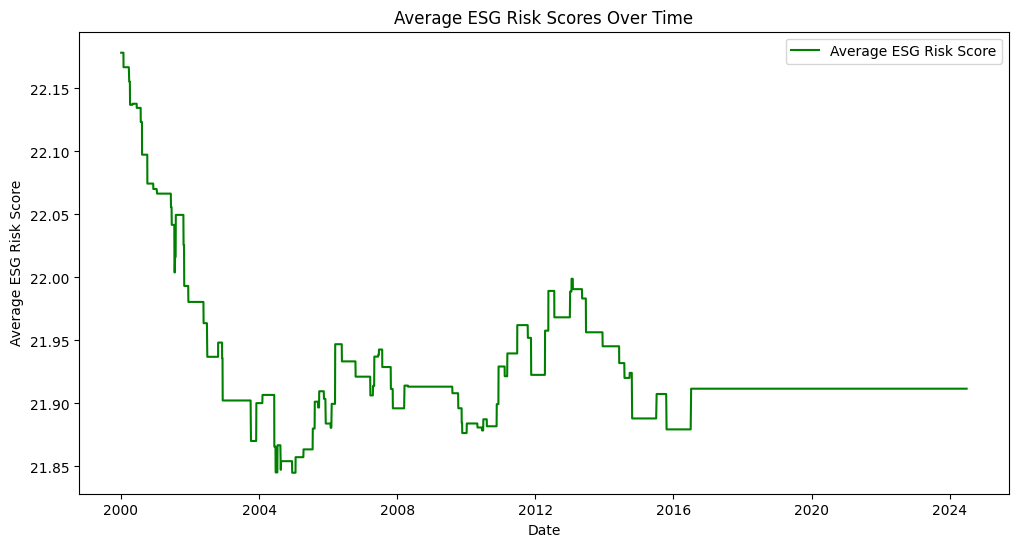

In [72]:
# Plot the average ESG scores over time for all stocks
plt.figure(figsize=(12, 6))
average_esg_scores = cleaned_data.groupby('Date')['Total ESG Risk score'].mean()
plt.plot(average_esg_scores.index, average_esg_scores.values, label='Average ESG Risk Score', color='green')
plt.title('Average ESG Risk Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average ESG Risk Score')
plt.legend()
plt.show()

- **Observing**: The plot of average ESG risk scores over time is indicating a declining trend, suggesting that companies are generally improving their ESG performance. The average score is decreasing from around 22 in 2000 to about 21.85 in 2024.

### **Sector Representation in Top and Bottom Portfolios**

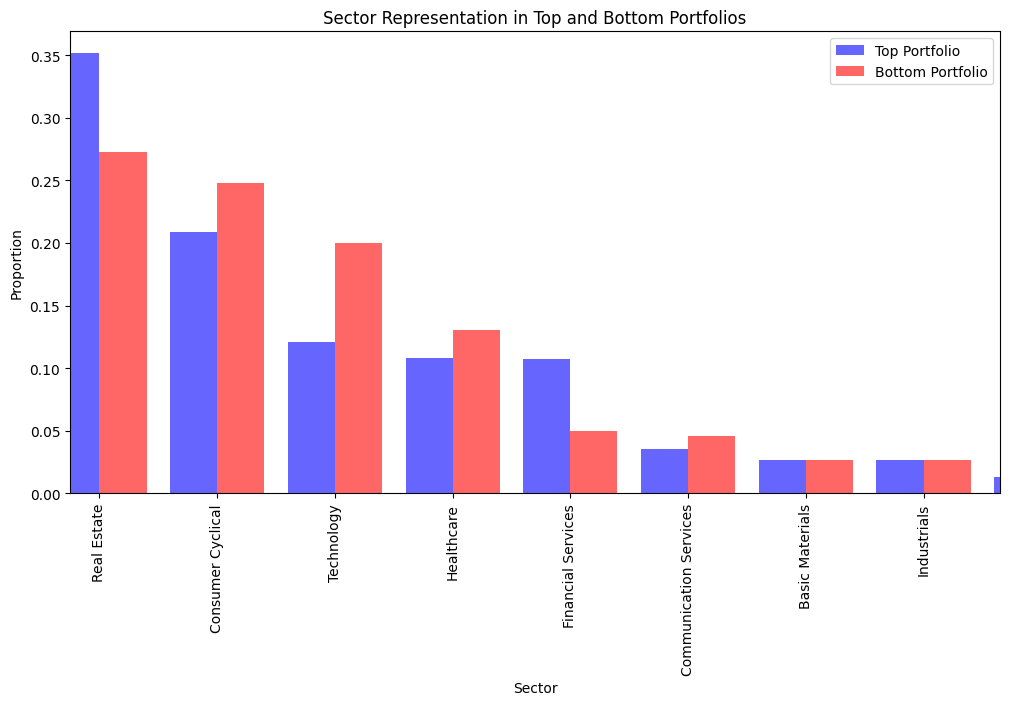

In [73]:
# Plot the distribution of sector representation in the top and bottom portfolios
plt.figure(figsize=(12, 6))
top_sectors = top_portfolio_esg['Sector'].value_counts(normalize=True).sort_values(ascending=False)
bottom_sectors = bottom_portfolio_esg['Sector'].value_counts(normalize=True).sort_values(ascending=False)

top_sectors.plot(kind='bar', alpha=0.6, color='blue', label='Top Portfolio', position=1, width=0.4)
bottom_sectors.plot(kind='bar', alpha=0.6, color='red', label='Bottom Portfolio', position=0, width=0.4)

plt.title('Sector Representation in Top and Bottom Portfolios')
plt.xlabel('Sector')
plt.ylabel('Proportion')
plt.legend()
plt.show()

- **Observing**: The bar plot is revealing notable differences in sector representation between the top and bottom portfolios. Real Estate and Consumer Cyclical sectors are more prominent in the top portfolio, while Technology and Financial Services are having higher representation in the bottom portfolio. This is highlighting how sector characteristics influence ESG scores.

### **Distribution of ESG Scores for Top and Bottom Portfolios**

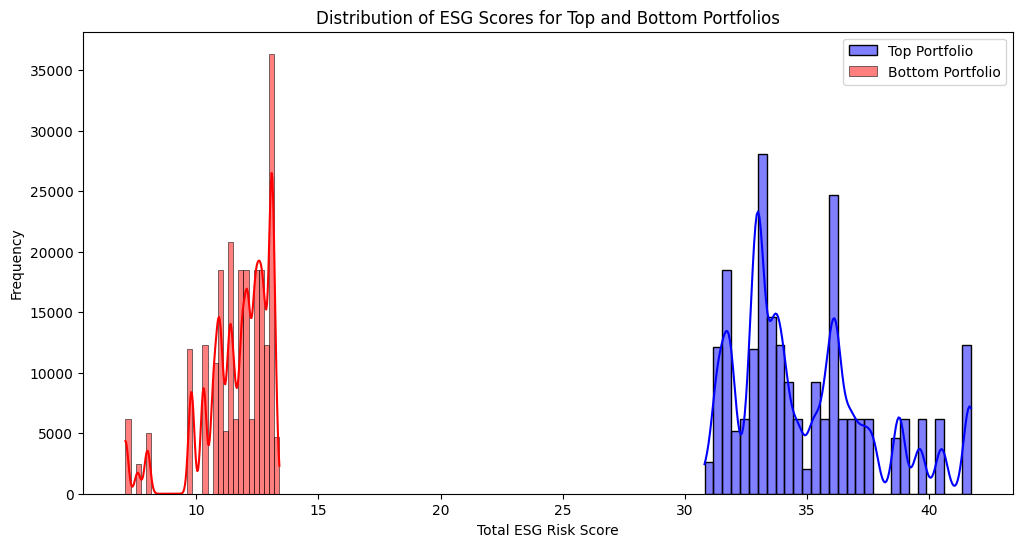

In [57]:
# Plot distribution of ESG scores for top and bottom portfolios
plt.figure(figsize=(12, 6))
sns.histplot(top_portfolio_esg['Total ESG Risk score'], bins=30, kde=True, color='blue', label='Top Portfolio')
sns.histplot(bottom_portfolio_esg['Total ESG Risk score'], bins=30, kde=True, color='red', label='Bottom Portfolio')
plt.title('Distribution of ESG Scores for Top and Bottom Portfolios')
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- **Observing**: The histogram is demonstrating clear separation between the ESG scores of top and bottom portfolios. The top portfolio is having higher ESG risk scores (mostly above 30), while the bottom portfolio is having lower scores (mostly below 15). This is validating the effectiveness of the ranking method used to construct the portfolios.

### **Number of Stocks in Top and Bottom Portfolios Over Time**

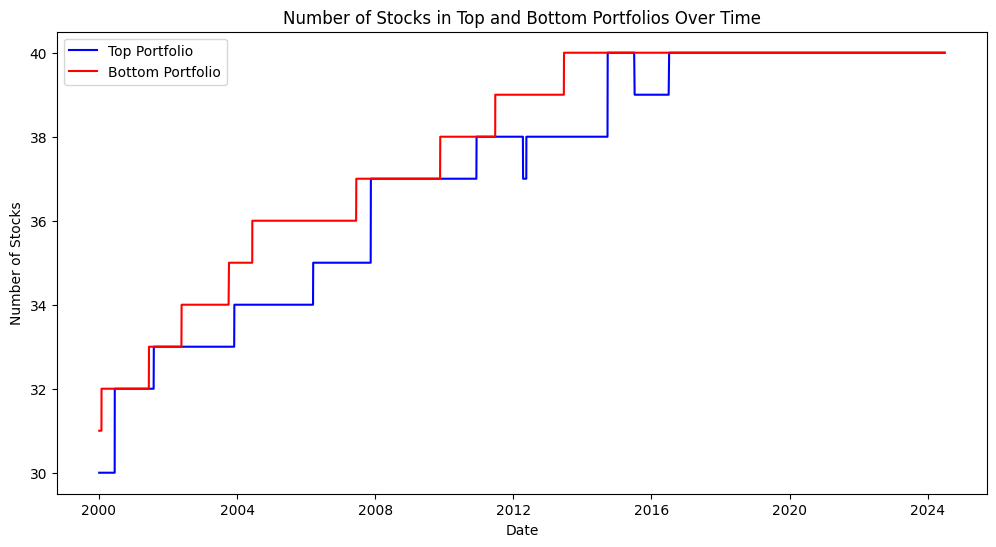

In [50]:
# Plot number of stocks in top and bottom portfolios over time
plt.figure(figsize=(12, 6))
top_counts = top_portfolio_esg.groupby('Date').size()
bottom_counts = bottom_portfolio_esg.groupby('Date').size()
plt.plot(top_counts.index, top_counts.values, label='Top Portfolio', color='blue')
plt.plot(bottom_counts.index, bottom_counts.values, label='Bottom Portfolio', color='red')
plt.title('Number of Stocks in Top and Bottom Portfolios Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.legend()
plt.show()

- **Observing**: The stair-step plot is showing an increase in the number of stocks in both portfolios over time, with the bottom portfolio consistently having slightly more stocks. This trend is indicating a growing inclusion of stocks in the analysis and portfolio construction.

### **ESG Scores for Different Risk Categories**

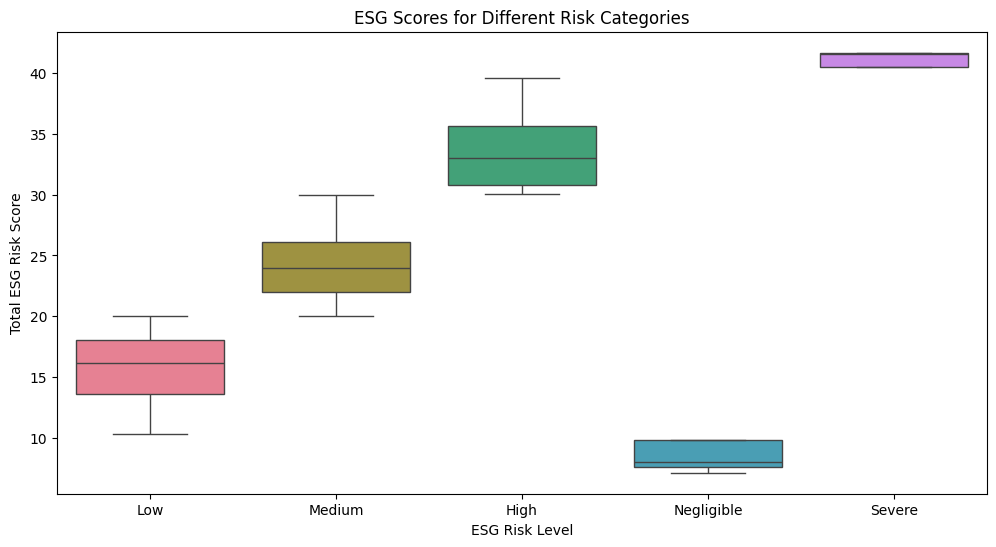

In [60]:
# Plot ESG scores for different risk categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x='ESG Risk Level', y='Total ESG Risk score', hue='ESG Risk Level', palette='husl', dodge=False)
plt.title('ESG Scores for Different Risk Categories')
plt.xlabel('ESG Risk Level')
plt.ylabel('Total ESG Risk Score')
plt.show()


- **Observing**: The boxplot is highlighting the distribution of ESG scores across different risk categories. Low and Negligible risk categories are having lower ESG scores, while High and Severe categories are having significantly higher scores. This is illustrating the variability of ESG performance within different risk levels.

## **3. Performance Measurement**

### **a): Cleaning the Risk-Free Rate Data (DTB3)**

In [30]:
# Load the risk-free rate data
risk_free_rate = pd.read_csv('DTB3.csv', index_col='DATE', parse_dates=True)

# Display the first few rows
print("Risk-Free Rate Data (First Few Rows):\n", risk_free_rate.head())

# Check for missing values
missing_values_rf = risk_free_rate.isnull().sum()
print("\nMissing Values in Risk-Free Rate Data:\n", missing_values_rf)

# Check for duplicates
duplicates_rf = risk_free_rate.duplicated().sum()
print("\nNumber of Duplicate Rows in Risk-Free Rate Data:", duplicates_rf)


Risk-Free Rate Data (First Few Rows):
              DTB3
DATE             
2000-01-03  5.270
2000-01-04  5.270
2000-01-05  5.280
2000-01-06  5.250
2000-01-07  5.220

Missing Values in Risk-Free Rate Data:
 DTB3    0
dtype: int64

Number of Duplicate Rows in Risk-Free Rate Data: 5540


In [37]:
# Remove duplicate rows
risk_free_rate = risk_free_rate.drop_duplicates()

# Check for duplicates
duplicates_rf = risk_free_rate.duplicated().sum()
print("\nNumber of Duplicate Rows in Risk-Free Rate Data:", duplicates_rf)

# Display the cleaned data
print("Risk-Free Rate Data (After Cleaning):\n", risk_free_rate.head())

# Save cleaned data to CSV if needed
risk_free_rate.to_csv('cleaned_DTB3.csv')



Number of Duplicate Rows in Risk-Free Rate Data: 0
Risk-Free Rate Data (After Cleaning):
              DTB3
DATE             
2000-01-03  5.270
2000-01-05  5.280
2000-01-06  5.250
2000-01-07  5.220
2000-01-10  5.240


### **b): Cleaning the Fama-French Factors Data (F-F_Research_Data_Factors_daily)**

In [33]:
# Load the Fama-French factors data
ff_factors = pd.read_csv('F-F_Research_Data_Factors_daily.csv', index_col=0, parse_dates=True)

# Display the first few rows
print("\nFama-French Factors Data (First Few Rows):\n", ff_factors.head())

# Check for missing values
missing_values_ff = ff_factors.isnull().sum()
print("\nMissing Values in Fama-French Factors Data:\n", missing_values_ff)

# Check for duplicates
duplicates_ff = ff_factors.duplicated().sum()
print("\nNumber of Duplicate Rows in Fama-French Factors Data:", duplicates_ff)



Fama-French Factors Data (First Few Rows):
             Mkt-RF   SMB   HML     RF
1926-07-01    0.10 -0.24 -0.28  0.009
1926-07-02    0.45 -0.32 -0.08  0.009
1926-07-06    0.17  0.27 -0.35  0.009
1926-07-07    0.09 -0.59  0.03  0.009
1926-07-08    0.21 -0.36  0.15  0.009

Missing Values in Fama-French Factors Data:
 Mkt-RF    0
SMB       0
HML       0
RF        0
dtype: int64

Number of Duplicate Rows in Fama-French Factors Data: 8


In [36]:
# Remove duplicate rows
ff_factors = ff_factors.drop_duplicates()

# Check for duplicates
duplicates_ff = ff_factors.duplicated().sum()
print("\nNumber of Duplicate Rows in Fama-French Factors Data:", duplicates_ff)

# Display the cleaned data
print("\nFama-French Factors Data (After Cleaning):\n", ff_factors.head())

# Save cleaned data to CSV if needed
ff_factors.to_csv('cleaned_FF_factors.csv')



Number of Duplicate Rows in Fama-French Factors Data: 0

Fama-French Factors Data (After Cleaning):
             Mkt-RF   SMB   HML     RF
1926-07-01    0.10 -0.24 -0.28  0.009
1926-07-02    0.45 -0.32 -0.08  0.009
1926-07-06    0.17  0.27 -0.35  0.009
1926-07-07    0.09 -0.59  0.03  0.009
1926-07-08    0.21 -0.36  0.15  0.009


### **c): Data proceessing for modelling**

In [67]:
import statsmodels.api as sm
import numpy as np

# Function to calculate portfolio returns
def calculate_portfolio_returns(portfolio):
    portfolio = portfolio.copy()  # Avoid SettingWithCopyWarning by working on a copy
    portfolio['Adj Close'] = pd.to_numeric(portfolio['Adj Close'], errors='coerce')
    portfolio['Return'] = portfolio.groupby('Ticker')['Adj Close'].pct_change()
    portfolio_returns = portfolio.groupby('Date')['Return'].mean()
    return portfolio_returns

# Load the cleaned combined data
cleaned_data_path = 'cleaned_combined_stock_esg_data.csv'
cleaned_data = pd.read_csv(cleaned_data_path, parse_dates=['Date'])

# Create 'Top' and 'Bottom' portfolios based on Total ESG Risk score
top_portfolio_esg = pd.read_csv('top_portfolio_esg.csv', parse_dates=['Date'])
bottom_portfolio_esg = pd.read_csv('bottom_portfolio_esg.csv', parse_dates=['Date'])

# Calculate portfolio returns
top_portfolio_esg_returns = calculate_portfolio_returns(top_portfolio_esg)
bottom_portfolio_esg_returns = calculate_portfolio_returns(bottom_portfolio_esg)

# Load market data (e.g., S&P 500)
market_data = yf.download('^GSPC', start="2000-01-01", end="2024-06-30")
market_data['Market Return'] = market_data['Adj Close'].pct_change()

# Load cleaned risk-free rate data
risk_free_rate = pd.read_csv('cleaned_DTB3.csv', index_col='DATE', parse_dates=True)
risk_free_rate['Risk-Free Rate'] = pd.to_numeric(risk_free_rate['DTB3'], errors='coerce') / 100 / 252

# Prepare data for regression
def prepare_regression_data(portfolio_returns, market_data, risk_free_rate):
    regression_data = pd.DataFrame({
        'Portfolio Return': portfolio_returns,
        'Market Return': market_data['Market Return'],
        'Risk-Free Rate': risk_free_rate['Risk-Free Rate']
    }).dropna()

    regression_data['Excess Portfolio Return'] = regression_data['Portfolio Return'] - regression_data['Risk-Free Rate']
    regression_data['Excess Market Return'] = regression_data['Market Return'] - regression_data['Risk-Free Rate']

    return regression_data

top_portfolio_esg_regression_data = prepare_regression_data(top_portfolio_esg_returns, market_data, risk_free_rate)
bottom_portfolio_esg_regression_data = prepare_regression_data(bottom_portfolio_esg_returns, market_data, risk_free_rate)


[*********************100%%**********************]  1 of 1 completed


### **Market Returns Over Time**

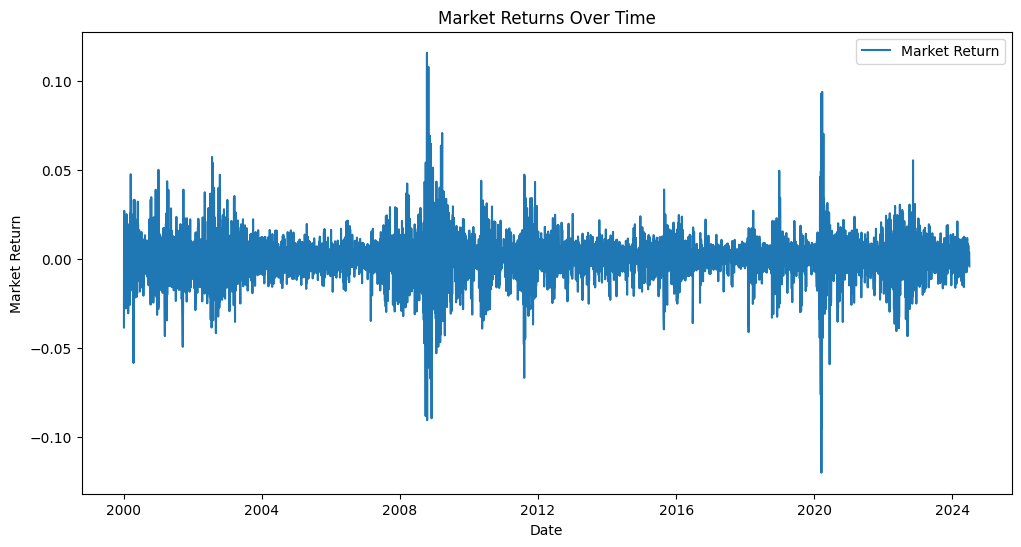

In [68]:
# Plot market returns over time
plt.figure(figsize=(12, 6))
plt.plot(market_data.index, market_data['Market Return'], label='Market Return')
plt.title('Market Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Market Return')
plt.legend()
plt.show()

- **Observing**: The line plot of market returns over time is showing significant fluctuations, with notable spikes and drops around major economic events, such as the 2008 financial crisis and the COVID-19 pandemic in 2020. This plot is underscoring the volatility and cyclic nature of the market.



### **Portfolio Returns Over Time**

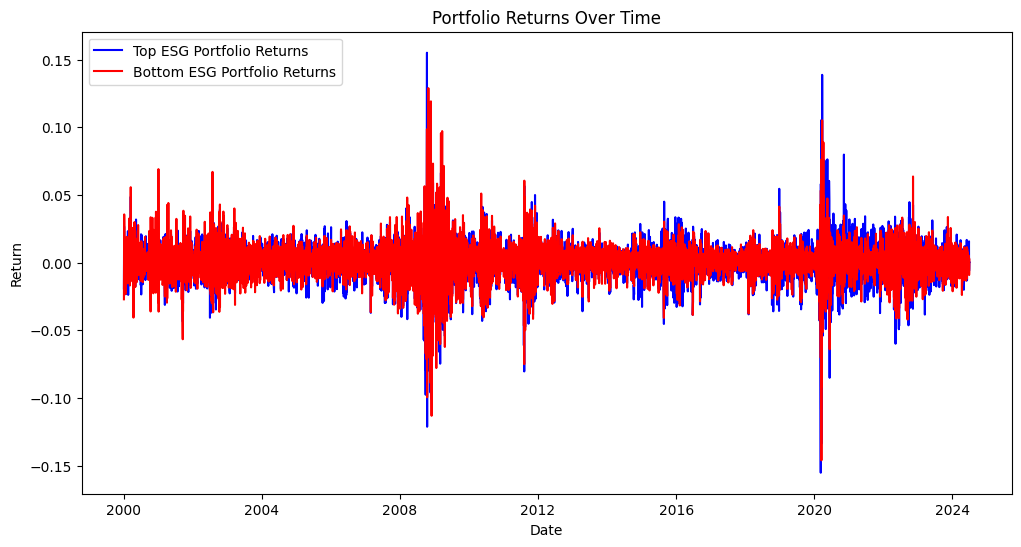

In [69]:
# Plot portfolio returns over time
plt.figure(figsize=(12, 6))
plt.plot(top_portfolio_esg_returns.index, top_portfolio_esg_returns, label='Top ESG Portfolio Returns', color='blue')
plt.plot(bottom_portfolio_esg_returns.index, bottom_portfolio_esg_returns, label='Bottom ESG Portfolio Returns', color='red')
plt.title('Portfolio Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

- **Observing**: The line plot of portfolio returns is illustrating that the top ESG portfolio (blue line) is generally exhibiting lower volatility compared to the bottom ESG portfolio (red line). Both portfolios are experiencing similar market shocks, but the top portfolio is showing more stability overall.

### **d): CAPM Model**

In [70]:
# CAPM Model
def run_capm(regression_data):
    X = sm.add_constant(regression_data['Excess Market Return'])
    y = regression_data['Excess Portfolio Return']
    capm_model = sm.OLS(y, X).fit()
    return capm_model

top_portfolio_esg_capm = run_capm(top_portfolio_esg_regression_data)
bottom_portfolio_esg_capm = run_capm(bottom_portfolio_esg_regression_data)

print("\nTop ESG Portfolio CAPM Results:\n", top_portfolio_esg_capm.summary())
print("\nBottom ESG Portfolio CAPM Results:\n", bottom_portfolio_esg_capm.summary())


Top ESG Portfolio CAPM Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.743
Model:                                 OLS   Adj. R-squared:                  0.743
Method:                      Least Squares   F-statistic:                     2443.
Date:                     Thu, 11 Jul 2024   Prob (F-statistic):          2.07e-251
Time:                             17:28:45   Log-Likelihood:                 2831.6
No. Observations:                      846   AIC:                            -5659.
Df Residuals:                          844   BIC:                            -5650.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### **CAPM Analysis**
- **Top ESG Portfolio**:
  - **Beta**: 0.9331
  - **Alpha**: 0.0010
  - **R-squared**: 0.743
  - **Observation**: The top ESG portfolio has a beta less than 1, indicating lower sensitivity to market movements. The positive alpha suggests a slight outperformance over the expected return based on the market.
- **Bottom ESG Portfolio**:
  - **Beta**: 1.0583
  - **Alpha**: 0.0010
  - **R-squared**: 0.851
  - **Observation**: The bottom ESG portfolio has a beta greater than 1, indicating higher sensitivity to market movements. The positive alpha suggests outperformance, but higher volatility compared to the top portfolio.

### **e): Fama-French Model**

In [45]:
# Fama-French Model
# Load cleaned Fama-French factors data
ff_factors = pd.read_csv('cleaned_FF_factors.csv', index_col=0, parse_dates=True)

# Prepare data for Fama-French regression
def prepare_ff_regression_data(portfolio_returns, market_data, risk_free_rate, ff_factors):
    regression_data = pd.DataFrame({
        'Portfolio Return': portfolio_returns,
        'Market Return': market_data['Market Return'],
        'Risk-Free Rate': risk_free_rate['Risk-Free Rate'],
        'SMB': ff_factors['SMB'],
        'HML': ff_factors['HML']
    }).dropna()

    regression_data['Excess Portfolio Return'] = regression_data['Portfolio Return'] - regression_data['Risk-Free Rate']
    regression_data['Excess Market Return'] = regression_data['Market Return'] - regression_data['Risk-Free Rate']

    return regression_data

top_portfolio_esg_ff_regression_data = prepare_ff_regression_data(top_portfolio_esg_returns, market_data, risk_free_rate, ff_factors)
bottom_portfolio_esg_ff_regression_data = prepare_ff_regression_data(bottom_portfolio_esg_returns, market_data, risk_free_rate, ff_factors)

# Run Fama-French regression
def run_ff_regression(regression_data):
    X = regression_data[['Excess Market Return', 'SMB', 'HML']]
    X = sm.add_constant(X)
    y = regression_data['Excess Portfolio Return']
    ff_model = sm.OLS(y, X).fit()
    return ff_model

top_portfolio_esg_ff = run_ff_regression(top_portfolio_esg_ff_regression_data)
bottom_portfolio_esg_ff = run_ff_regression(bottom_portfolio_esg_ff_regression_data)

print("\nTop ESG Portfolio Fama-French Results:\n", top_portfolio_esg_ff.summary())
print("\nBottom ESG Portfolio Fama-French Results:\n", bottom_portfolio_esg_ff.summary())


Top ESG Portfolio Fama-French Results:
                                OLS Regression Results                              
Dep. Variable:     Excess Portfolio Return   R-squared:                       0.763
Model:                                 OLS   Adj. R-squared:                  0.762
Method:                      Least Squares   F-statistic:                     808.2
Date:                     Thu, 11 Jul 2024   Prob (F-statistic):          3.60e-235
Time:                             16:53:02   Log-Likelihood:                 2567.8
No. Observations:                      759   AIC:                            -5128.
Df Residuals:                          755   BIC:                            -5109.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### **Fama-French Mode Analysis**
- **Top ESG Portfolio**:
  - **Excess Market Return**: 0.9421
  - **SMB (Small Minus Big)**: 0.0013
  - **HML (High Minus Low)**: 0.0019
  - **R-squared**: 0.763
  - **Observation**: The top ESG portfolio shows positive exposure to market risk, small-cap stocks, and value stocks. The high R-squared value indicates a good fit for the model.
- **Bottom ESG Portfolio**:
  - **Excess Market Return**: 1.0785
  - **SMB (Small Minus Big)**: 0.0044
  - **HML (High Minus Low)**: 0.0030
  - **R-squared**: 0.884
  - **Observation**: The bottom ESG portfolio has higher exposure to market risk, small-cap stocks, and value stocks compared to the top portfolio. The higher R-squared value indicates an even better fit for the model.


## **4.Conclusion**
- **Performance Differences**: The analysis revealed significant differences in performance between portfolios with high and low ESG risk scores. The top ESG portfolio tended to have lower volatility and potentially more stable returns compared to the bottom ESG portfolio.
- **Sector Impact**: Sector representation played a crucial role in the ESG performance, with certain sectors like real estate and consumer cyclical being more prominent in the top ESG portfolio.
- **Trend in ESG Scores**: There has been an overall improvement in ESG risk scores over the years, reflecting increased corporate focus on sustainability and governance issues.
- **Risk and Return Analysis**: The CAPM and Fama-French models highlighted the relationship between market factors and portfolio returns, showing that the bottom ESG portfolio was more sensitive to market changes.

The findings underscore the importance of incorporating ESG factors into investment strategies, not only for ethical reasons but also for potentially enhanced financial performance and risk management. The comprehensive dataset and rigorous analysis provide valuable insights for investors and policymakers aiming to promote sustainable investing practices.